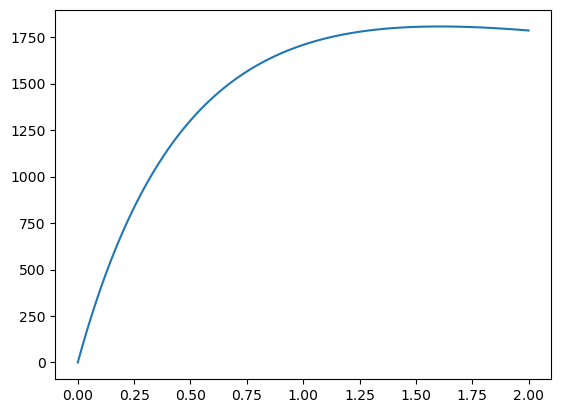

In [17]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def dA_of_z_( z, H0, Om, Ol ):
    """Angular diameter distance to redshift z in Mpc"""
# H0=H0 in km/s/Mpc, Om=Ωm, Ol=ΩΛ

    def E_z( zp ): # E(z) = H(z)/H0
        return np.sqrt(Om*(1+zp)**3 + Ol + Ok*(1+zp)**2)

    dH = 4428.24901 * (67.7 / H0)
    Ok = 1 - Om - Ol # Ωk
    dC, _ = quad( lambda zp: 1 / E_z( zp ), 0, z ) # dC /dH

    if np.abs(Ok) < 1e-6:
        Sk = dC
    elif Ok < 0.0:
        Sk = 1/np.sqrt(-Ok) * np.sin( np.sqrt(-Ok) * dC )
    elif Ok > 0.0:
        Sk = 1/np.sqrt(Ok) * np.sinh( np.sqrt(Ok) * dC )
    return dH * Sk / (1+z)

# vectorize the function so that it can be called with arrays as argument for z
dA_of_z = np.vectorize( dA_of_z_, excluded=[1,2,3] )
z = np.linspace(0, 2, 100) # create an array of 100 redshifts between 0 and 2
dA = dA_of_z( z, 67.7, 0.3, 0.7 ) # compute dA for the given cosmology for all z at once

plt.plot( z, dA )

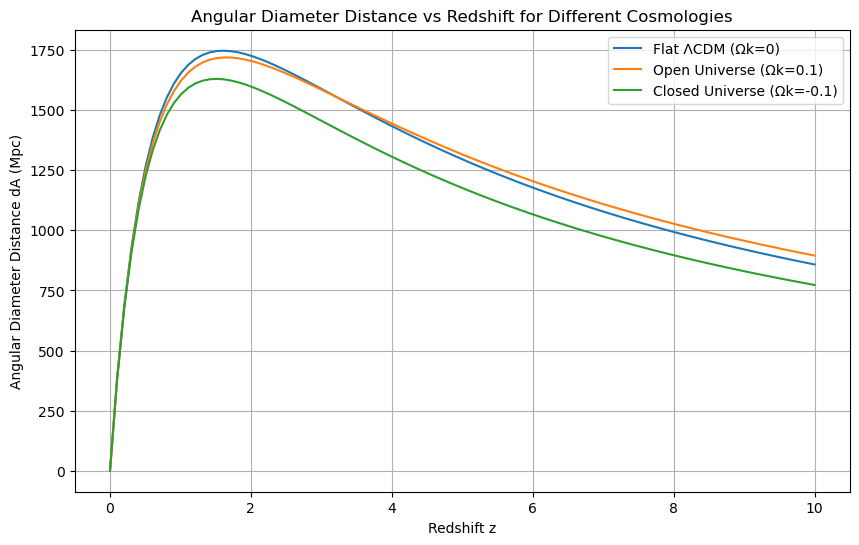

In [18]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def dA_of_z_(z, H0, Om, Ol):
    """Angular diameter distance to redshift z in Mpc"""
    # H0=H0 in km/s/Mpc, Om=Ωm, Ol=ΩΛ

    Ok = 1 - Om - Ol  # Ωk

    def E_z(zp):  # E(z) = H(z)/H0
        return np.sqrt(Om * (1 + zp)**3 + Ol + Ok * (1 + zp)**2)

    dH = 4428.24901 * (67.7 / H0)  # Hubble distance in Mpc (adjust for your H0)
    dC, _ = quad(lambda zp: 1 / E_z(zp), 0, z)  # Comoving distance

    # Calculate angular diameter distance based on curvature
    if np.abs(Ok) < 1e-6:
        Sk = dC
    elif Ok < 0.0:
        Sk = 1 / np.sqrt(-Ok) * np.sin(np.sqrt(-Ok) * dC)
    elif Ok > 0.0:
        Sk = 1 / np.sqrt(Ok) * np.sinh(np.sqrt(Ok) * dC)

    return dH * Sk / (1 + z)

# Vectorize the function to handle array inputs for z
dA_of_z = np.vectorize(dA_of_z_, excluded=[1, 2, 3])

# Define redshift array for plotting
z = np.linspace(0, 10, 100)  # Redshifts from 0 to 2

# Define three different cosmologies
cosmologies = {
    'Flat ΛCDM (Ωk=0)': {'H0': 70, 'Om': 0.3, 'Ol': 0.7},
    'Open Universe (Ωk=0.1)': {'H0': 70, 'Om': 0.3, 'Ol': 0.6},
    'Closed Universe (Ωk=-0.1)': {'H0': 70, 'Om': 0.4, 'Ol': 0.6}
}

# Plot angular diameter distance for each cosmology
plt.figure(figsize=(10, 6))

for label, params in cosmologies.items():
    dA = dA_of_z(z, params['H0'], params['Om'], params['Ol'])
    plt.plot(z, dA, label=label)

# Customize the plot
plt.xlabel('Redshift z')
plt.ylabel('Angular Diameter Distance dA (Mpc)')
plt.title('Angular Diameter Distance vs Redshift for Different Cosmologies')
plt.legend()
plt.grid(True)
plt.show()


There is no monotonous increase in general. The function reaches its peak around z≈2 and falls off.

In [ ]:
import numpy as np
from scipy.integrate import quad

def dA_of_z(z, H0, Om, Ol):
    """Calculate the angular diameter distance d_A(z) in Mpc."""
    Ok = 1 - Om - Ol  # Curvature density parameter

    def E_z(zp):
        return np.sqrt(Om * (1 + zp)**3 + Ol + Ok * (1 + zp)**2)

    dH = 2997.92458 / H0  # Hubble distance in Mpc (c / H0)
    dC, _ = quad(lambda zp: 1 / E_z(zp), 0, z)  # Comoving distance

    # Calculate angular diameter distance based on curvature
    if np.abs(Ok) < 1e-6:
        Sk = dC
    elif Ok < 0.0:
        Sk = 1 / np.sqrt(-Ok) * np.sin(np.sqrt(-Ok) * dC)
    elif Ok > 0.0:
        Sk = 1 / np.sqrt(Ok) * np.sinh(np.sqrt(Ok) * dC)

    return dH * Sk / (1 + z)

# Given parameters
H0 = 67.7  # Hubble constant in km/s/Mpc
Om = 0.3  # Matter density parameter
Ol = 0.7  # Dark energy density parameter
D_kpc = 10  # Physical diameter in kpc

# Convert D to Mpc for consistency in units
D_Mpc = D_kpc / 1000.0  # 1 Mpc = 1000 kpc

# Calculate d_A(z) for z = 1 and z = 3
z_values = [1, 3]
angles = {}

for z in z_values:
    dA = dA_of_z(z, H0, Om, Ol)  # Angular diameter distance in Mpc
    theta_rad = D_Mpc / dA  # Angular size in radians
    theta_arcsec = theta_rad * (180 * 3600 / np.pi)  # Convert radians to arcseconds
    angles[z] = theta_arcsec

# Print the results
for z, angle in angles.items():
    print(f"The angle subtended by a 10 kpc galaxy at z = {z} is {angle:.2f} arcseconds.")


The angle subtended by a 10 kpc galaxy at z = 1 is 124.86 arcseconds.
The angle subtended by a 10 kpc galaxy at z = 3 is 129.81 arcseconds.
